
# Example of a classification task in ML


## Classification workflow

* 1\. Data processing: clean, prepare and manipulate the data
    * 1.1\. Import data from csv/json/html/xml file to Pandas dataFrame
    * 1.2\. Check the importation (check that the number of imported rows/columns match with the number of rows/columns in the original file)
    * 1.3\. EDA (Exploratory Data Analyis)
        * 1.3.1\. Understand the data, identifiy the target variable and the dependant variables, take notes about it
        * 1.3.2\. Visualize the original data:
            * Display class balancing (Oversampling - SMOTE, Undersampling - RandomUnder Sampler)
            * Visualize correlation between features
        * 1.3.3\. If the data has a large amount of features -> dimensionality reduction ( Features selection and Engineering: variance threshold, univariate selection, statistical tests. Linear Dimensionality Reduction Methods: PCA, Factor analysis, LDA, TSNE)
    * 1.4\. Split the data into a training and a test set
* 2\. For each classification model to try (decision tree, KNN, SVM, Naïve Bayes, Neural network, etc.)
    * 2.1\. Initialize the model
    * 2.2\. Train the model (tune the hyperparameters if necessary and retrain, iterative process)
    * 2.3\. Evaluate the model performance on the test sets
    
* 3\. Compare the performance achieved on the test set for the different models
    * 3.1\. Show in a simple table the different performances
    * 3.2\. Visualize the results
    
    


In [15]:
# Utils
import numpy as np
import os
from PIL import Image
from pathlib import Path
import csv
import math

# Data collection
import pandas as pd

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Models - classifiers
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # KNN neighbors classifier
from sklearn.svm import SVC # svm classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes classifier
from sklearn.neural_network import MLPClassifier # Multilayer perceptron classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Features selection
from sklearn.feature_selection import VarianceThreshold # variance threshold
from sklearn.feature_selection import SelectKBest # univariate selection that makes use of a statistical test
from sklearn.feature_selection import chi2 # chi square - qualitative features
from sklearn.feature_selection import f_classif # anova - quantitative features
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LogisticRegression # logistic regression

# Data handling
from sklearn.model_selection import train_test_split # Import train_test_split function

# Performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def load_ipython_extension(ip):
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")

### 1. Data processing: clean, prepare and manipulate the data

#### 1.1 Import data from csv/json/html/xml file to Pandas dataFrame

In [16]:

# Import all animals with their features and their belonging class (a number)
PATH = "../data/classification/zoo.csv"
all_animals = pd.read_csv(PATH)

# Import the names corresponding to each class
PATH2 = "../data/classification/class.csv"
all_classes = pd.read_csv(PATH2)
classes_name = {}
for i in range(len(all_classes.index)):
    classes_name[i+1] = all_classes.loc[i].Class_Type
print("> Data imported")

> Data imported


#### 1.2 Check the importation (check that the number of imported rows/columns match with the number of rows/columns in the original file)

In [17]:
# Count the number of rows and columns in the csv
with open(PATH) as f:
    reader = csv.reader(f)
    first_row = next(reader)
    nb_cols = len(first_row)
    nb_lines = len(list(reader))

print(f"CSV: Total number of row: {nb_lines}")
print(f"CSV: Total number of row without header: {nb_lines-1}")
print(f"CSV: Total number of columns: {nb_cols}\n\n")

# Display information about the datafFame
all_animals.info()
all_animals.describe(include="all")


CSV: Total number of row: 101
CSV: Total number of row without header: 100
CSV: Total number of columns: 18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [4]:
# Show the 5 first rows of the dataFrame
all_animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
all_animals.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [6]:
if nb_lines == all_animals.shape[0] and nb_cols == all_animals.shape[1]:
    print("> All data is correctly saved")
else:
    print("> Number of rows/columns does not match")

> All data is correctly saved


#### 1.3 EDA (Exploratory Data Analyis)

##### 1.3.1 Understand the data, identifiy the target variable and the dependant variables, take notes about it

In [7]:
# split dataset in features and target variable

# Get the name of all columns
all_cols= list(all_animals.columns)

# Remove the column containing the label and useless columns (ids)
all_cols.remove(all_animals.columns[-1])
all_cols.remove(all_animals.columns[0])
features_name = all_cols
label_name =  all_animals.columns[-1]

# All rows split into features and labels
features = all_animals[features_name]
labels = all_animals[label_name]

##### 1.3.2. Visualize the original data

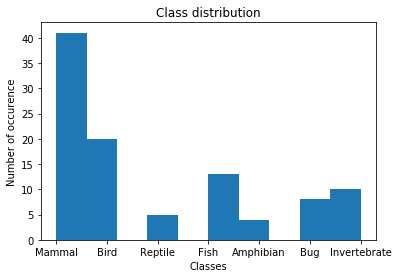

In [8]:
# Visualize the repartition of the different classes
x = list(labels)
plt.hist(x)
plt.ylabel('Number of occurence')
plt.xlabel('Classes');
plt.title("Class distribution")
plt.xticks(list(classes_name.keys()), [classes_name[i+1] for i in range(len(list(classes_name.keys())))])
plt.show()

The classes are not balanced. The class 1 contains the biggest amount of samples, followed by the class 2.

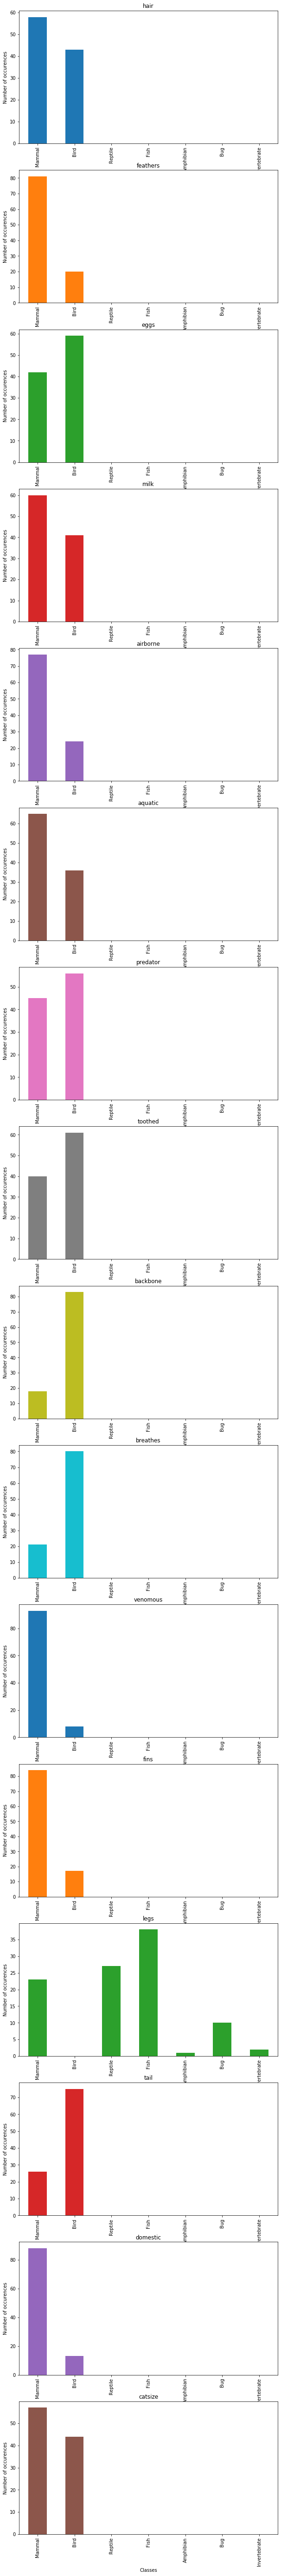

In [9]:
# Visualize the repartition between the features
axes = features.apply(pd.value_counts).plot(kind="bar", subplots=True, legend=False, figsize=(10, 100), sharex=False )
for i in range(len(features.columns)):
    axes[i].set_ylabel('Number of occurences')
    axes[i].set_xlabel('Classes')
    axes[i].set_xticklabels([classes_name[i+1] for i in range(len(list(classes_name.keys())))], rotation=90)
plt.show()

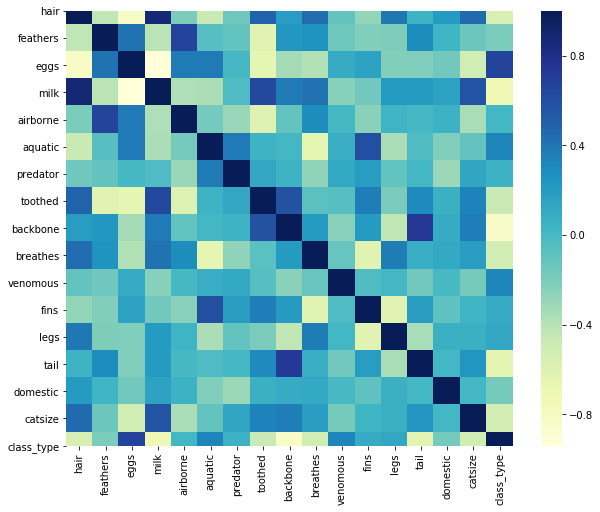

In [10]:
# Correlation Matrix of Features
corrs = all_animals.corr().round(2)
plt.figure(figsize = (10, 8))
sns.heatmap(corrs, cmap="YlGnBu")

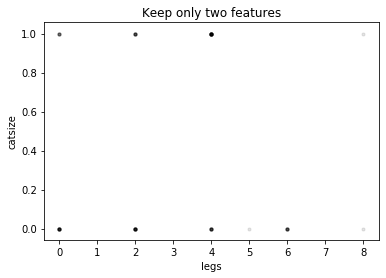

In [11]:
# Just a quick test: visualize the data using ONLY the two most important features according to their variance (i.e. the ones that have the biggest variance)
# Create data
N = 500
x = all_animals['legs']
y = all_animals['catsize']
colors = [[0,0,0]]
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.1)
plt.title('Keep only two features')
plt.xlabel('legs')
plt.ylabel('catsize')
plt.show()


Using only the "leg" and "catsize" features would allow us to distinguish between the classes. In that case, dark dots indicate that many samples are overlapping. Light dots tell us that a small amount of samples are ovelapping. 

##### 1.3.3. Features selection
In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:
- simplification of models to make them easier to interpret by researchers/users
- shorter training times,
- to avoid the curse of dimensionality,
- generalization by reducing overfitting (formally, reduction of variance)

In this work, all features are kept to train the model. However, if we had to reduce the number of features, we could use the following methods:

In [15]:

# -------------------- MANUAL FEATURE SELECTION -----------------------------
# According to variance threshold i.e. delete all features that are constant with in p % of the time
# These features have a variance lower than p*(1-p)
print("-----VARIANCE THRESHOLD-----")
variance_threshold_selector = VarianceThreshold(threshold=(0.8 * (1-0.8)))
features_after_variance_threshold = variance_threshold_selector.fit_transform(features)
print(f"> 5 first rows of the remaining features after variance_threshold:\n {features_after_variance_threshold}")
print(f"\n> Dimensions {features_after_variance_threshold.shape}")



# --------------------- UNIVARIATE FEATURE SELECTION -------------------------
# According to the chi2 statistical test. This test is used when the features are categorical
print("\n\n-----CHI2-----")
# Keep the 6 most significant features
chi2_features_selector = SelectKBest(score_func=chi2, k=6)
chi2_scores = chi2_features_selector.fit(features, labels)
print("> Chi2-score achieved by each feature:")
np.set_printoptions(precision=3)
print(chi2_scores.scores_)
features_after_chi2 = chi2_scores.transform(features)
print("\n> 5 first rows of the remaining features after chi2 test:")
print(features_after_chi2[0:5])
print(f"\n> Dimensions {features_after_chi2.shape}")

# According to the f_classif classifier, i.e. compute the ANOVA F-value. 
# This test is used when the features are quantitative (not our case)
print(f"\n\n-----ANOVA------------")
fvalue_selector = SelectKBest(f_classif, k=6)
features_after_fvalue = fvalue_selector.fit_transform(features, labels)
print("> 5 first rows of the remaining features after anova test:")
print(features_after_fvalue[0:5])
print(f"\n> Dimensions {features_after_fvalue.shape}")


#----------------------------RECURSIVE FEATURE ELIMINATION---------------------
print(f"\n\n-----RECURSIVE FEATURE ELIMINATION------------")
rfe_model = LogisticRegression(multi_class="auto", solver="newton-cg")
nb_features_to_remove = 5
rfe_selector = RFE(rfe_model, nb_features_to_remove)
features_after_rfe = rfe_selector.fit(features, labels)
print(">The model decided to keep the following features")
print(features_after_rfe.support_)

-----VARIANCE THRESHOLD-----
> 5 first rows of the remaining features after variance_threshold:
 [[1 0 1 ... 4 0 1]
 [1 0 1 ... 4 1 1]
 [0 1 0 ... 0 1 0]
 ...
 [1 0 1 ... 4 1 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 2 1 0]]

> Dimensions (101, 11)


-----CHI2-----
> Chi2-score achieved by each feature:
[48.834 81.    37.42  60.    49.215 29.869  5.431 37.06  18.    17.339
 17.59  62.554 81.171 16.88   4.193 20.976]

> 5 first rows of the remaining features after chi2 test:
[[1 0 1 0 0 4]
 [1 0 1 0 0 4]
 [0 0 0 0 1 0]
 [1 0 1 0 0 4]
 [1 0 1 0 0 4]]

> Dimensions (101, 6)


-----ANOVA------------
> 5 first rows of the remaining features after anova test:
[[1 0 0 1 1 1]
 [1 0 0 1 1 1]
 [0 0 1 0 1 1]
 [1 0 0 1 1 1]
 [1 0 0 1 1 1]]

> Dimensions (101, 6)


-----RECURSIVE FEATURE ELIMINATION------------


C:\Users\Jojo\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


>The model decided to keep the following features
[False  True False  True False False False  True  True  True False False
 False False False False]


Each of the previous methods resulted in choosing certain features. For the following of this work, all features are kept.

##### 1.3.4 Identify outliers and treat them (not done in this work)

In statistics, an outlier is an observation point that is distant from other observations. Machine learning algorithms are very sensitive to the range and distribution of data points. Data outliers can deceive the training process resulting in longer training times and less accurate models.

Outlier Detection methods:
    - Visualizing the data
    - Extreme Value Analysis (Not done in this work)
    - Z-score method (Not done in this work)
    - K Means clustering-based approach (Not done in this work)

Outlier Treatment:
    - Mean/Median or random Imputation (Not done in this work)
    - Trimming (Not done in this work)
    - Top, Bottom and Zero Coding (Not done in this work)
    - Discretization (Not done in this work)

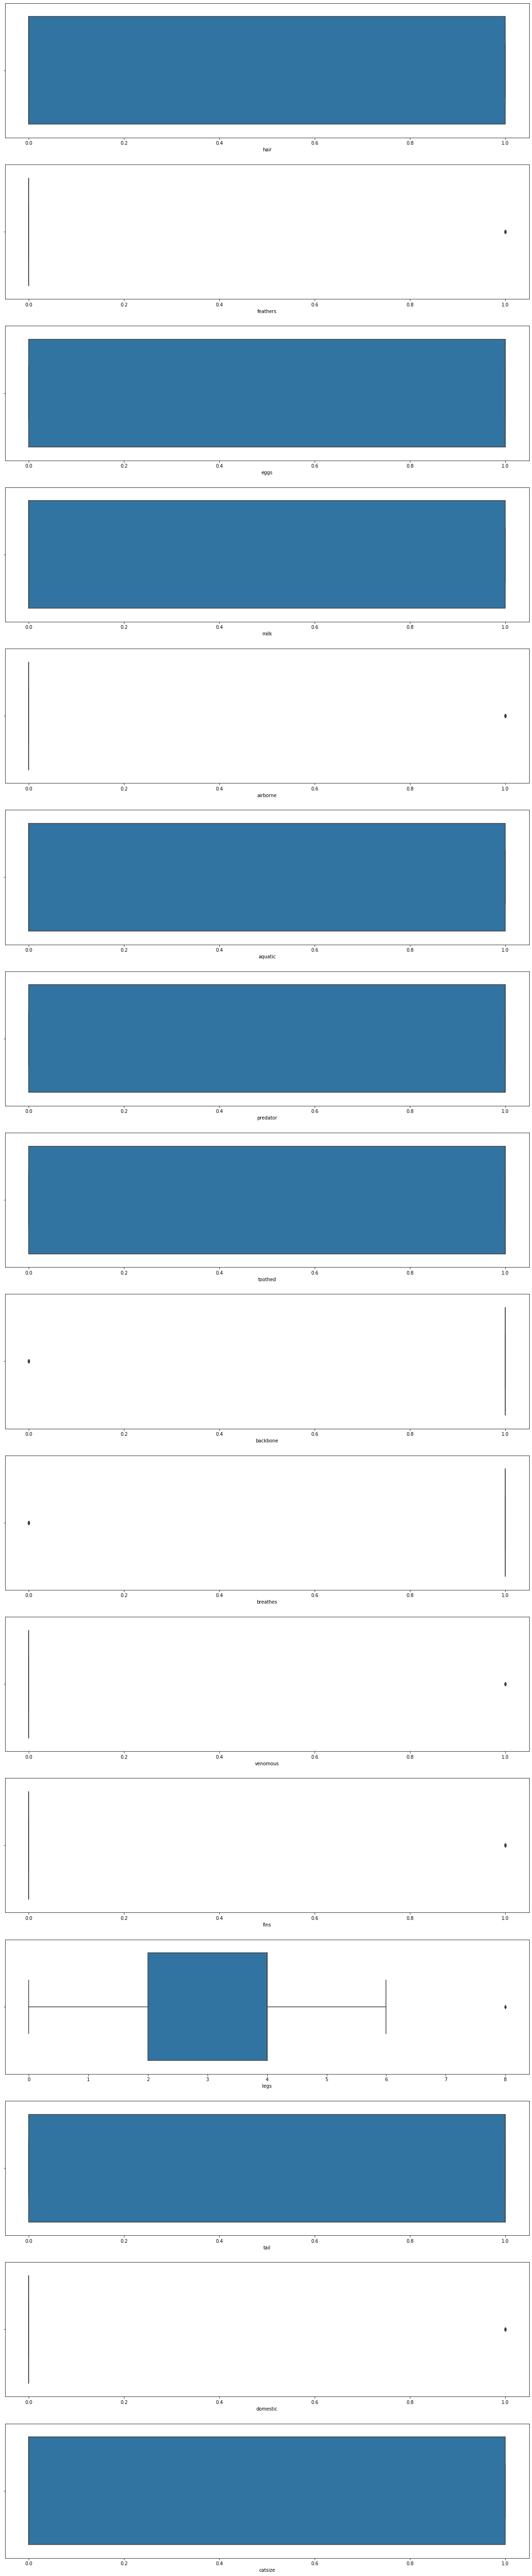

In [37]:
# Identify outliers by visualizing the data
## Box plots display min (=Q1-1.5*IQR), lower quartile, median, upper quartile (that constitute the Interquartile Range) and max (=Q3+1.5*IQR).
plt.figure(figsize=(20, 100))
for index, (columnName, columnData) in enumerate(features.iteritems()):
    plt.subplot(len(features.columns), 1, index+1)
    sns.boxplot(x=columnData)
    


##### 1.3.5 Create a training set and test set

In [17]:
# 70% training and 30% test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1, stratify=labels)

### 2. For each classification model to try (decision tree, KNN, SVM, Naïve Bayes, Neural network, etc.)

#### 2.1. Initialize the models

In [18]:
KNeighbors_model = KNeighborsClassifier()

decision_tree_model = DecisionTreeClassifier()

svc_model = SVC(kernel='rbf', gamma="scale")

gaussian_naive_bayes = GaussianNB()

mlp_model = MLPClassifier(hidden_layer_sizes=(150,100,50))

all_classifiers = [KNeighbors_model, decision_tree_model, svc_model, gaussian_naive_bayes, mlp_model]
all_classifiers_names = ["KNN", "Decision Tree", "SVC", "Naive Bayes", "Multi layer Perceptron"]

#### 2.2. Train the models (tune the hyperparameters if necessary and retrain, iterative process)

In [19]:
# Train the different models on the data
for classifier in all_classifiers:
    classifier.fit(train_features, train_labels)

print("> All models trained")

> All models trained


 #### 2.3. Evaluate the model performance on the test set to measure the generalization ability of the latter

In [20]:
# Compute the predictions of each model on the test data
# Store the predictions of each model
# Make a report of the results for each model
all_classifier_predictions = []
for index, classifier in enumerate(all_classifiers):
    print(f"-----------------------------{all_classifiers_names[index]}-----------------------------")
    classifier_predictions = classifier.predict(test_features)
    all_classifier_predictions.append(classifier_predictions)
    print(classification_report(test_labels, classifier_predictions, target_names=[classes_name[i+1] for i in range(len(list(classes_name.keys())))]))


-----------------------------KNN-----------------------------
              precision    recall  f1-score   support

      Mammal       1.00      0.88      0.93         8
        Bird       1.00      1.00      1.00         4
     Reptile       0.00      0.00      0.00         1
        Fish       0.60      1.00      0.75         3
   Amphibian       1.00      1.00      1.00         1
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.80      0.84      0.81        21
weighted avg       0.90      0.90      0.89        21

-----------------------------Decision Tree-----------------------------
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         8
        Bird       1.00      1.00      1.00         4
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         

C:\Users\Jojo\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jojo\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3. Compare the performance achieved on the test set for the different models

{'accuracy': {'KNN': 0.9047619047619048, 'Decision Tree': 0.9523809523809523, 'SVC': 0.9523809523809523, 'Naive Bayes': 1.0, 'Multi layer Perceptron': 1.0}, 'f1-score': {'KNN': 0.9047619047619048, 'Decision Tree': 0.9523809523809523, 'SVC': 0.9523809523809523, 'Naive Bayes': 1.0, 'Multi layer Perceptron': 1.0}, 'precision': {'KNN': 0.9047619047619048, 'Decision Tree': 0.9523809523809523, 'SVC': 0.9523809523809523, 'Naive Bayes': 1.0, 'Multi layer Perceptron': 1.0}, 'recall': {'KNN': 0.9047619047619048, 'Decision Tree': 0.9523809523809523, 'SVC': 0.9523809523809523, 'Naive Bayes': 1.0, 'Multi layer Perceptron': 1.0}}


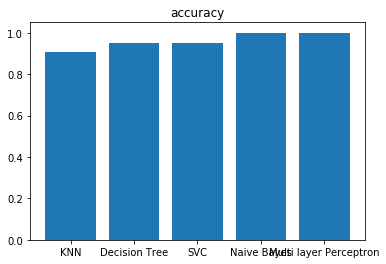

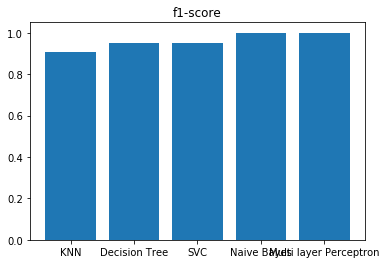

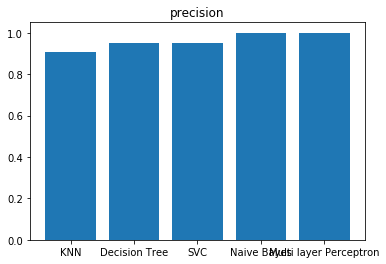

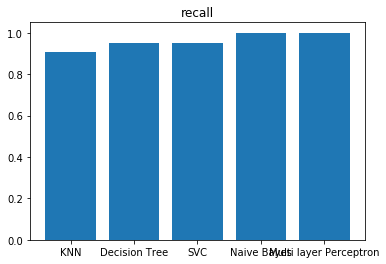

In [36]:
metrics_list = [metrics.accuracy_score, metrics.f1_score, metrics.precision_score, metrics.recall_score]
metrics_names = ["accuracy","f1-score","precision","recall"]

# Dictionary {
#    metric_name: {model_name: value, model2_name:value}
#    metric_name: {model_name: value, model2_name:value}
# }
# Compute the performance of all models for each metric
all_metric_all_models = {}
for index, metric_name in enumerate(metrics_names):
    all_metric_all_models.setdefault(metric_name, {})
    for index2, classifier in enumerate(all_classifiers_names):
        if (metric_name=="f1-score" or metric_name=="recall" or metric_name=="precision"):
            all_metric_all_models[metric_name][classifier] = metrics_list[index](test_labels, all_classifier_predictions[index2], average="micro")
        else:
            all_metric_all_models[metric_name][classifier] = metrics_list[index](test_labels, all_classifier_predictions[index2])

print(all_metric_all_models)

for index, metric in enumerate(all_metric_all_models.keys()):
    plt.title(metric)
    plt.bar(range(len(all_metric_all_models[metric])), list(all_metric_all_models[metric].values()), align='center')
    plt.xticks(range(len(all_metric_all_models[metric])), list(all_metric_all_models[metric].keys()))
    plt.show()
    




Two models (Naive Bayes and Multilayer perceptron) give perfect results. They are the best models for this classification task.